In [5]:
flights = [
    ('F1', 9, 11),
    ('F2', 10, 12),
    ('F3', 13, 15),
    ('F4', 11, 12),
    ('F5', 16, 18)
]

crew_members = ['C1', 'C2', 'C3']


In [6]:
def can_assign(flight, assigned_flights):
    fid, start, end = flight
    
    for (afid, s, e) in assigned_flights:
        # Check overlap
        if not (end <= s or e <= start):
            return False
        
        # Minimum 1 hour rest
        if 0 < start - e < 1:
            return False
        if 0 < s - end < 1:
            return False
    
    return True
#This function checks if the new flight can be placed after checking overlap and rest time.

In [7]:
def assign_flights(flights, crew):
    assignment = {c: [] for c in crew}

    def backtrack(i):
        if i == len(flights):
            return True  # all flights assigned
        
        flight = flights[i]
        
        # Try assigning to each crew
        for c in crew:
            if can_assign(flight, assignment[c]):
                assignment[c].append(flight)
                
                if backtrack(i + 1):
                    return True
                
                assignment[c].pop()  # undo (backtrack)
        
        return False  # no valid assignment

    success = backtrack(0)
    return success, assignment
    
#We try assigning each flight to each crew member.
#If not possible → we undo (backtrack).
#When all flights are assigned → we return success.

In [8]:
ok, result = assign_flights(flights, crew_members)
print("Success:", ok)

for c in result:
    print(c, ":", [f[0] for f in result[c]])


Success: True
C1 : ['F1', 'F3', 'F4', 'F5']
C2 : ['F2']
C3 : []


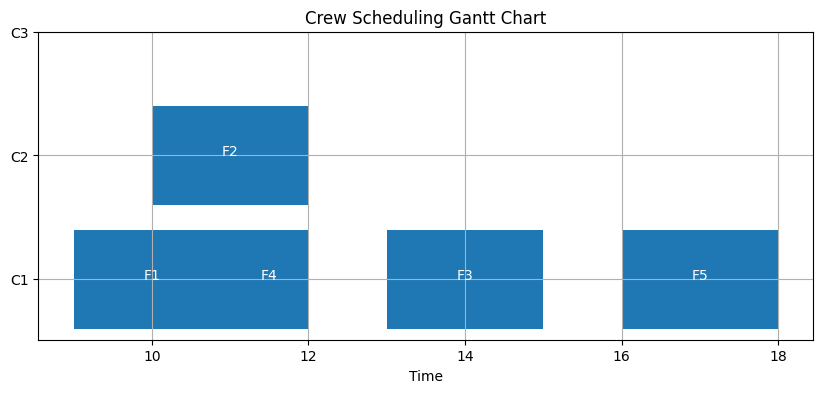

In [9]:
import matplotlib.pyplot as plt

def plot_gantt(assignment):
    fig, ax = plt.subplots(figsize=(10,4))
    
    for i, crew in enumerate(assignment):
        for (fid, s, e) in assignment[crew]:
            ax.broken_barh([(s, e-s)], (i-0.4, 0.8))
            ax.text(s+(e-s)/2, i, fid, color="white", ha="center")
    
    ax.set_yticks(range(len(assignment)))
    ax.set_yticklabels(assignment.keys())
    ax.set_xlabel("Time")
    ax.set_title("Crew Scheduling Gantt Chart")
    ax.grid(True)
    plt.show()

plot_gantt(result)


## Time Complexity
Backtracking tries to assign each flight to each crew member.

If:
- n = number of flights
- k = number of crew

Worst case:  k × k × k … repeated n times  
→ **O(kⁿ)** (exponential)

This is why the problem is NP-Hard.
